<a href="https://colab.research.google.com/github/dasdebojit/The-Sparks-Foundation-Internship-Tasks/blob/main/TSF_KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - THE SPARKS FOUNDATION**
## **Task-2 Prediction using Unsupervised ML**

*By: Debojit Das* 


# Importing requisite libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()
%matplotlib inline

# Loading the Iris Dataset

In [8]:
iris_dataset = datasets.load_iris()
iris_dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [65]:
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Univariate Analysis 

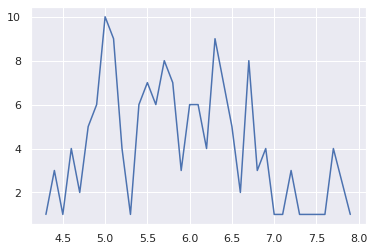

In [55]:
df['sepal length (cm)'].value_counts().sort_index().plot.line()

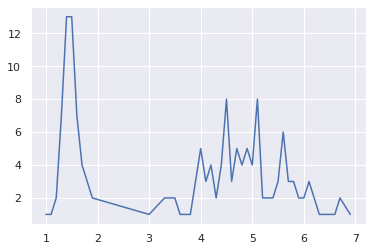

In [56]:
df['petal length (cm)'].value_counts().sort_index().plot.line()

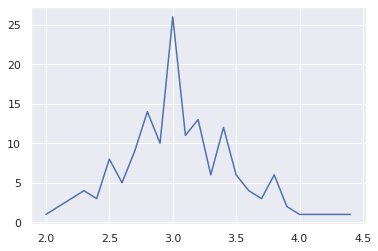

In [57]:
df['sepal width (cm)'].value_counts().sort_index().plot.line()

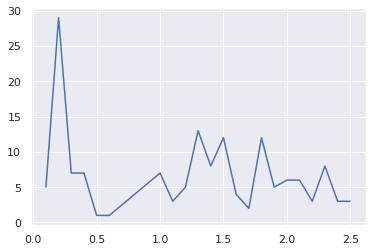

In [58]:
df['petal width (cm)'].value_counts().sort_index().plot.line()

Since none of the distribution plots follow a normal distribution like structure, so MinMaxScaler can be used to normalize the values for obtaining better results after model training.

# Normalizing the dataset

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [60]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [67]:
df_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# Determining optimal number of clusters(Elbow Method)




In [68]:
X = df_scaled.values
from sklearn.cluster import KMeans
wcss = []

for i in range(10):
  kmeans = KMeans(n_clusters = i+1, init = 'k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

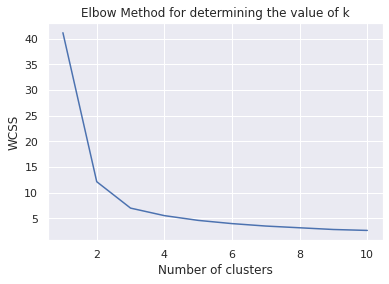

In [69]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for determining the value of k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Visualizing the Clusters

In [70]:
kmeans = KMeans(n_clusters = 3)
y = kmeans.fit_predict(X)

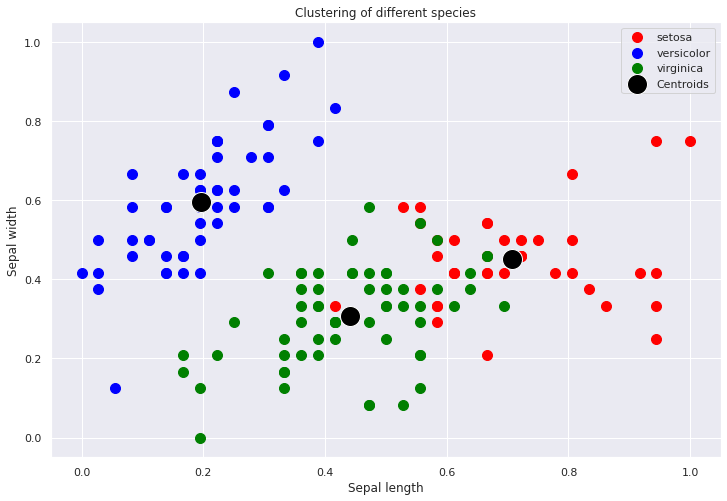

In [73]:
colors = ['red', 'blue', 'green']
target = iris_dataset.target_names

plt.figure(figsize=(12, 8))

for i in range(3):
  plt.scatter(X[y == i, 0], X[y == i, 1], s = 100, c = colors[i], label = target[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 400, c = 'black', label = 'Centroids', edgecolors = 'white')
plt.title('Clustering of different species')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()

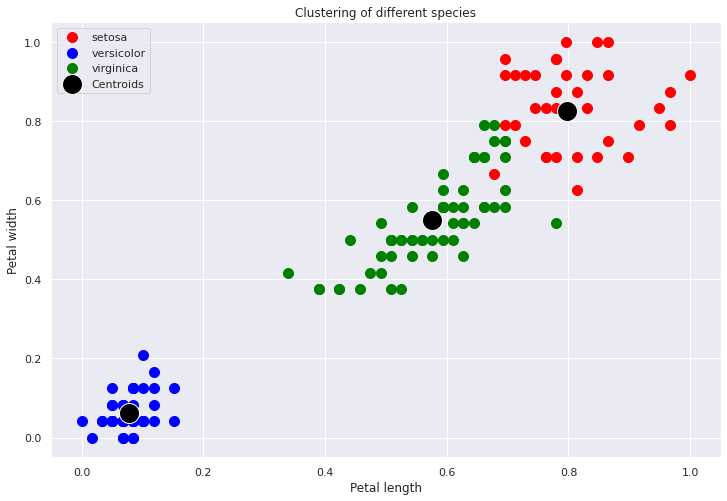

In [74]:
colors = ['red', 'blue', 'green']
target = iris_dataset.target_names

plt.figure(figsize=(12, 8))

for i in range(3):
  plt.scatter(X[y == i, 2], X[y == i, 3], s = 100, c = colors[i], label = target[i])

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s= 400, c = 'black', label = 'Centroids', edgecolors = 'white')
plt.title('Clustering of different species')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()